In [30]:
#### Estimating the values of N, delta and alpha for Order Statistics Bounding technique only for lower bound ####
import numpy as np
from scipy.stats import beta, uniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
%matplotlib inline

# Sample of size N from a uniform distribution 
trials = 1000
delta_left = 0.5
delta_right = 1.0
points = 1000
observations_list = list()
N_values = [50,100,200,400]

for N in N_values:
    for delta in np.linspace(delta_left, delta_right, points):  # Values of delta

        samples = np.random.uniform(0,1,size=(trials, N))
        order_stats = np.sort(samples, 1)
        
        l_limit = np.array([beta.ppf(q=(1-delta)/2.0, a=i, b=N-i+1) for i in range(1, N+1)])
        
        order_stats_cdf = uniform.ppf(order_stats)
        violation_counter = 0.0
        
        for t in range(trials):
            for i, cdf_value in enumerate(order_stats_cdf[t,:]):
                if  cdf_value < l_limit[i]:
                    violation_counter += 1.0
                    break        

        est_alpha_prime = violation_counter / trials
        observations_list.append([N, delta, 1.0 - est_alpha_prime])

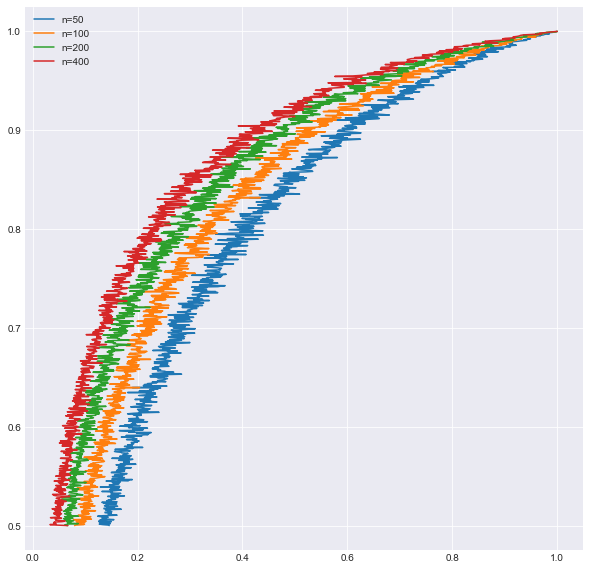

In [31]:
df = pd.DataFrame(data=observations_list, columns=["N", "delta", "alpha"])
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

sns.set_style("darkgrid")
plt.subplot()
for N in N_values:
    alpha_values = df[df["N"] == N].loc[:, ["alpha"]]
    delta = df[df["N"] == N].loc[:, ["delta"]]
    plt.plot(alpha_values, delta, label="n=" + str(N))
plt.legend(loc="best")
plt.show()

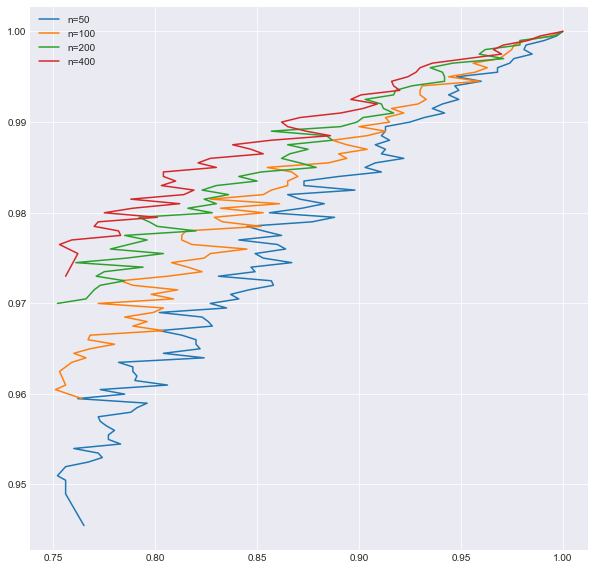

In [32]:

min_alpha = 0.75

plt.subplot()
sns.set_style("darkgrid")

for N in N_values:
    alpha_bool = np.logical_and((df["N"] == N),(df["alpha"] > min_alpha))
    alpha_values = df[alpha_bool].loc[:, ["alpha"]]
    delta_values = df[alpha_bool].loc[:, ["delta"]]

    plt.plot(alpha_values, delta_values, label="n=" + str(N))
plt.legend(loc="best")
plt.show()

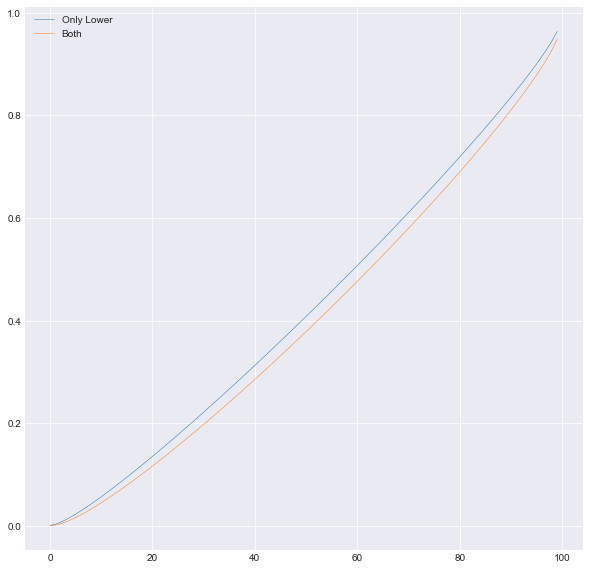

In [33]:

delta = 0.95

# Roughly the same confidence. Want to see how much the actual bounds differ.
# Significant performance when we take lower confidence values such as 80% or something.

N = 100
lower = []
both = []
for i in range(1, N+1):
    both.append(beta.ppf(q=(1-(delta+0.04))/2.0, a=i, b=N-i+1))
    lower.append(beta.ppf(q=(1-delta)/2.0, a=i, b=N-i+1))
    
# print(both)
# print(lower)

l1 = plt.plot(np.arange(N), lower, label="Only Lower")
plt.setp(l1,linewidth = 0.5)
l2 = plt.plot(np.arange(N), both, label="Both")
plt.setp(l2,linewidth = 0.5)
plt.legend(loc="best")